<a href="https://colab.research.google.com/github/KOT1HATOP/ml_labs/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/agricultural_yield_train.csv')
df1 = pd.read_csv('/content/agricultural_yield_test.csv')
df

#С БОГОМ

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665
...,...,...,...,...,...,...,...
15995,77.053550,1,154.189768,103.115855,319.915079,7,956.781949
15996,99.795631,1,282.295839,123.598354,647.292136,4,879.682714
15997,67.478487,1,120.017122,102.308627,514.372747,8,932.829561
15998,85.176890,1,247.847389,114.956634,695.035801,6,889.738438


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [5]:
"""
Код здесь
"""
X = df
y = df.Yield_kg_per_hectare # тут у нас целевая переменная
X = X.drop('Yield_kg_per_hectare', axis=1) # признаки для исследования

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      16000 non-null  float64
 1   Seed_Variety                      16000 non-null  int64  
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64
 3   Sunny_Days                        16000 non-null  float64
 4   Rainfall_mm                       16000 non-null  float64
 5   Irrigation_Schedule               16000 non-null  int64  
 6   Yield_kg_per_hectare              16000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 875.1 KB


In [7]:
df['Seed_Variety'] = X.Seed_Variety.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Soil_Quality                      16000 non-null  float64 
 1   Seed_Variety                      16000 non-null  category
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64 
 3   Sunny_Days                        16000 non-null  float64 
 4   Rainfall_mm                       16000 non-null  float64 
 5   Irrigation_Schedule               16000 non-null  int64   
 6   Yield_kg_per_hectare              16000 non-null  float64 
dtypes: category(1), float64(5), int64(1)
memory usage: 765.9 KB


In [8]:
cat_columns  = df.select_dtypes(include=['category']).columns # категориальные колонки
num_columns = df.select_dtypes(include=['float64', 'int64']).columns # числвоые колонки

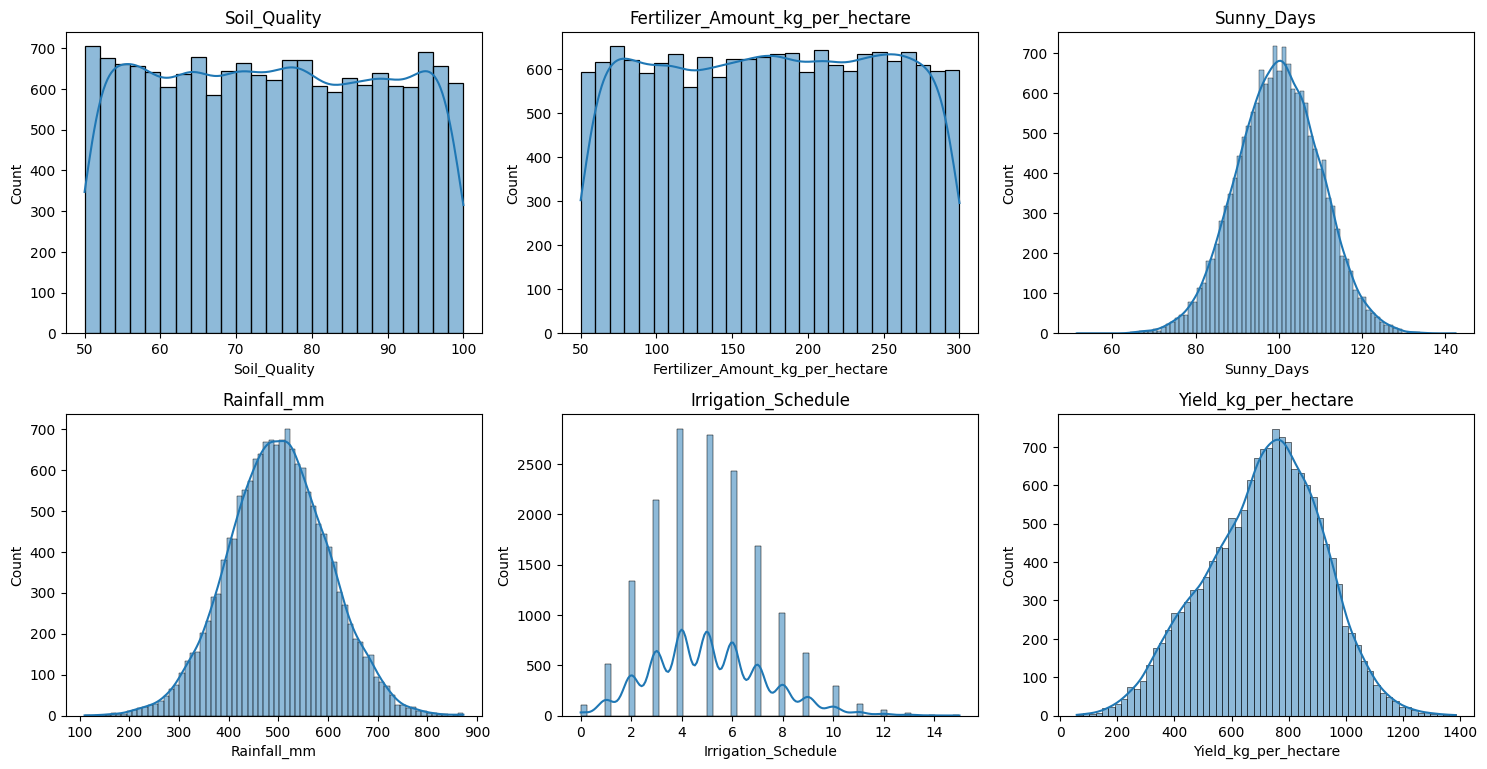

In [9]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='Seed_Variety', ylabel='Yield_kg_per_hectare'>

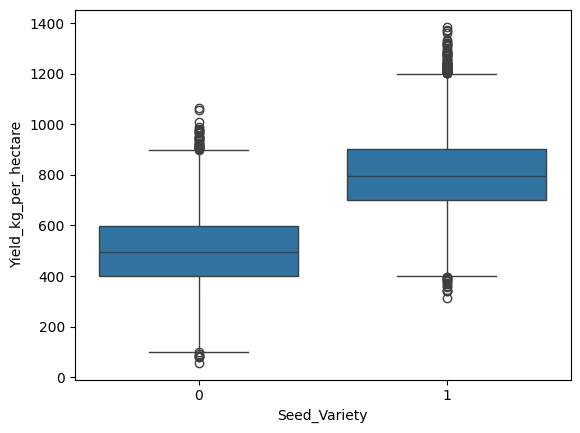

In [11]:
sns.boxplot(data=df, x='Seed_Variety', y='Yield_kg_per_hectare')

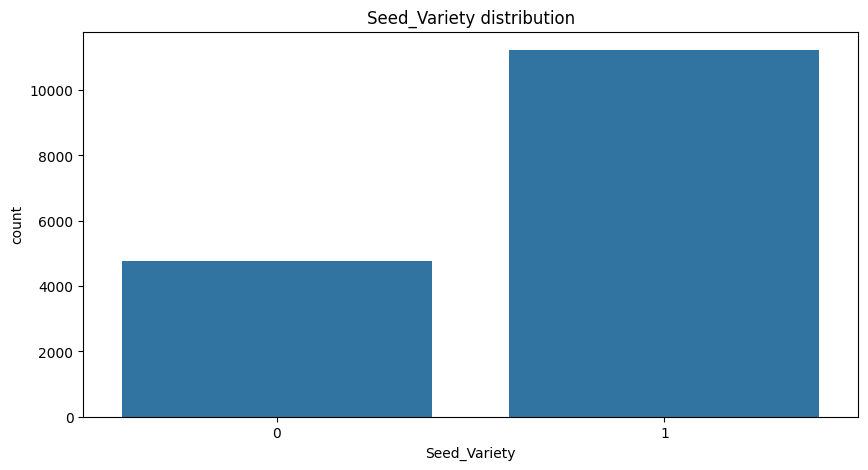

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Seed_Variety')
plt.title('Seed_Variety distribution')
plt.show()


In [13]:
df.columns

Index(['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare',
       'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule',
       'Yield_kg_per_hectare'],
      dtype='object')

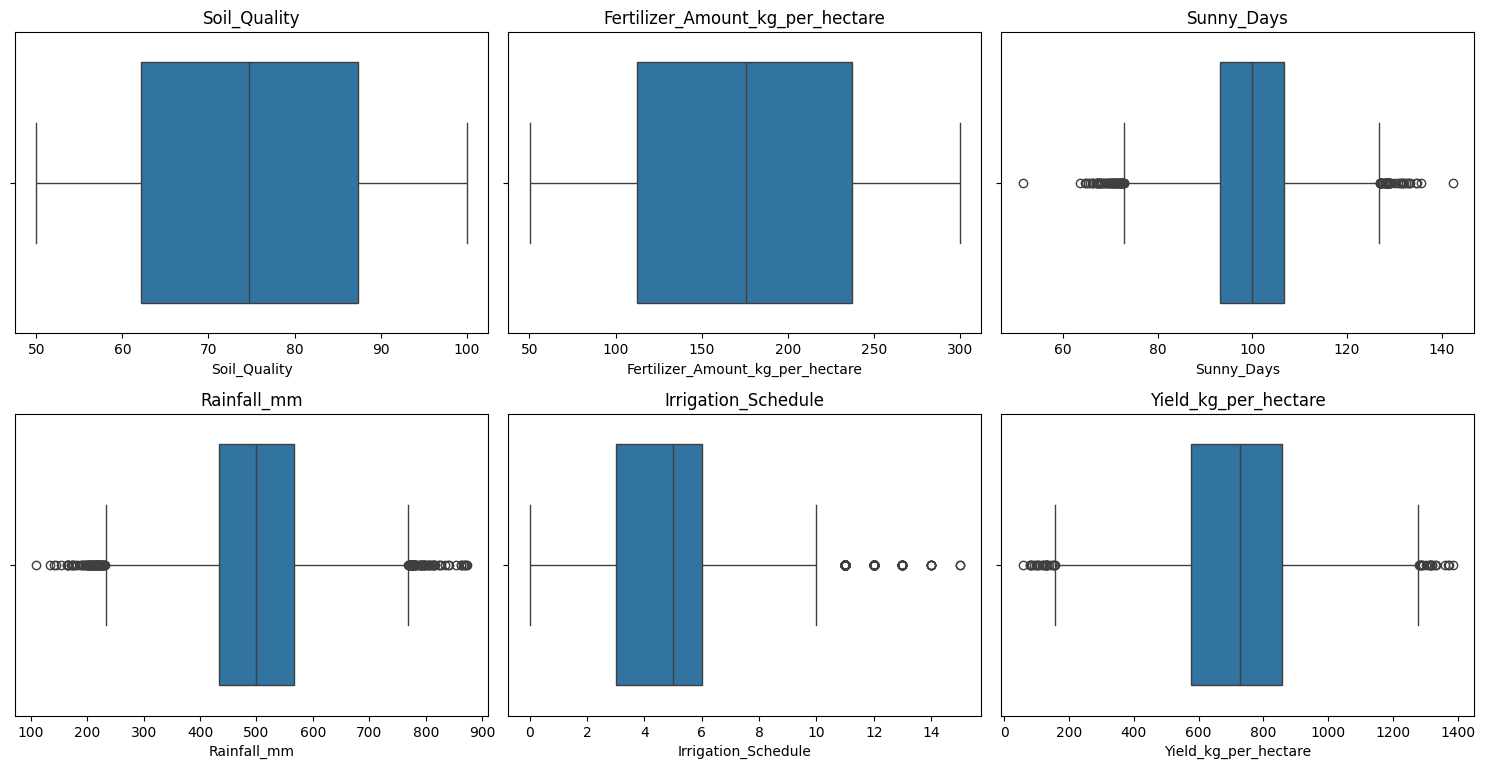

In [15]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

<ipython-input-16-c9872dbd6b35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


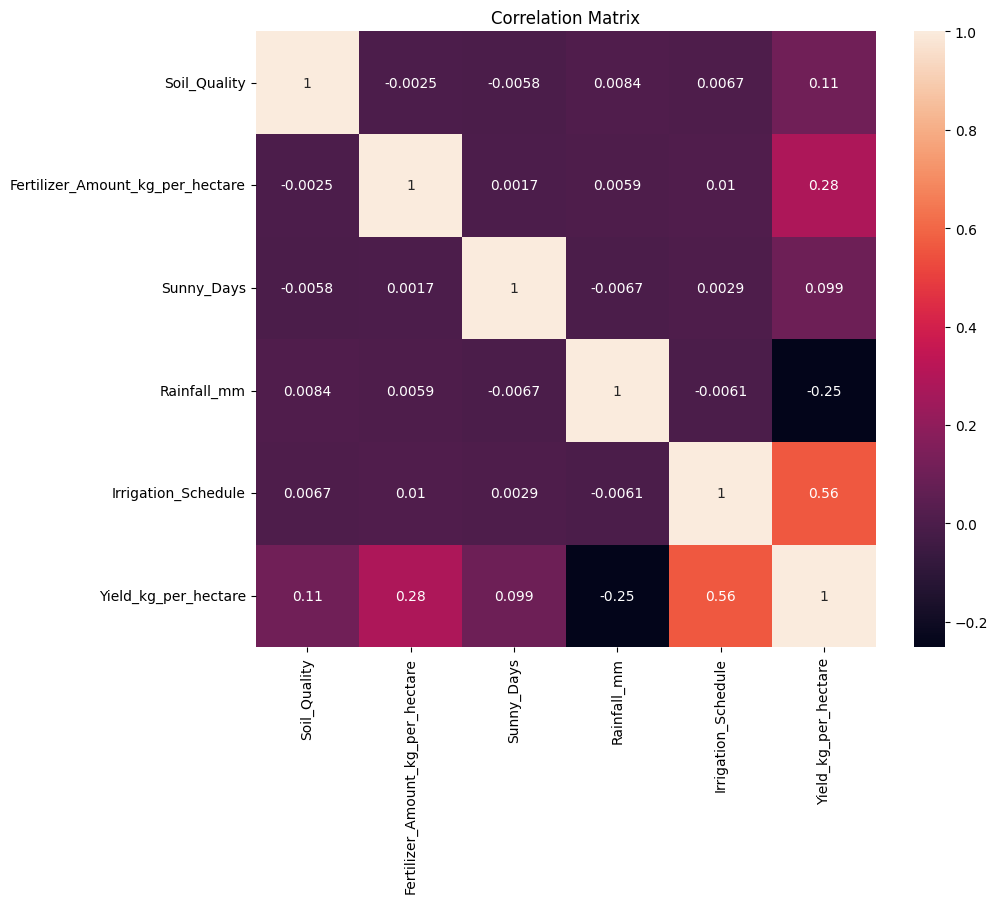

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.corr()['Yield_kg_per_hectare']

<ipython-input-17-1f44410f3462>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Yield_kg_per_hectare']


Soil_Quality                        0.109346
Fertilizer_Amount_kg_per_hectare    0.284841
Sunny_Days                          0.099349
Rainfall_mm                        -0.252165
Irrigation_Schedule                 0.561456
Yield_kg_per_hectare                1.000000
Name: Yield_kg_per_hectare, dtype: float64

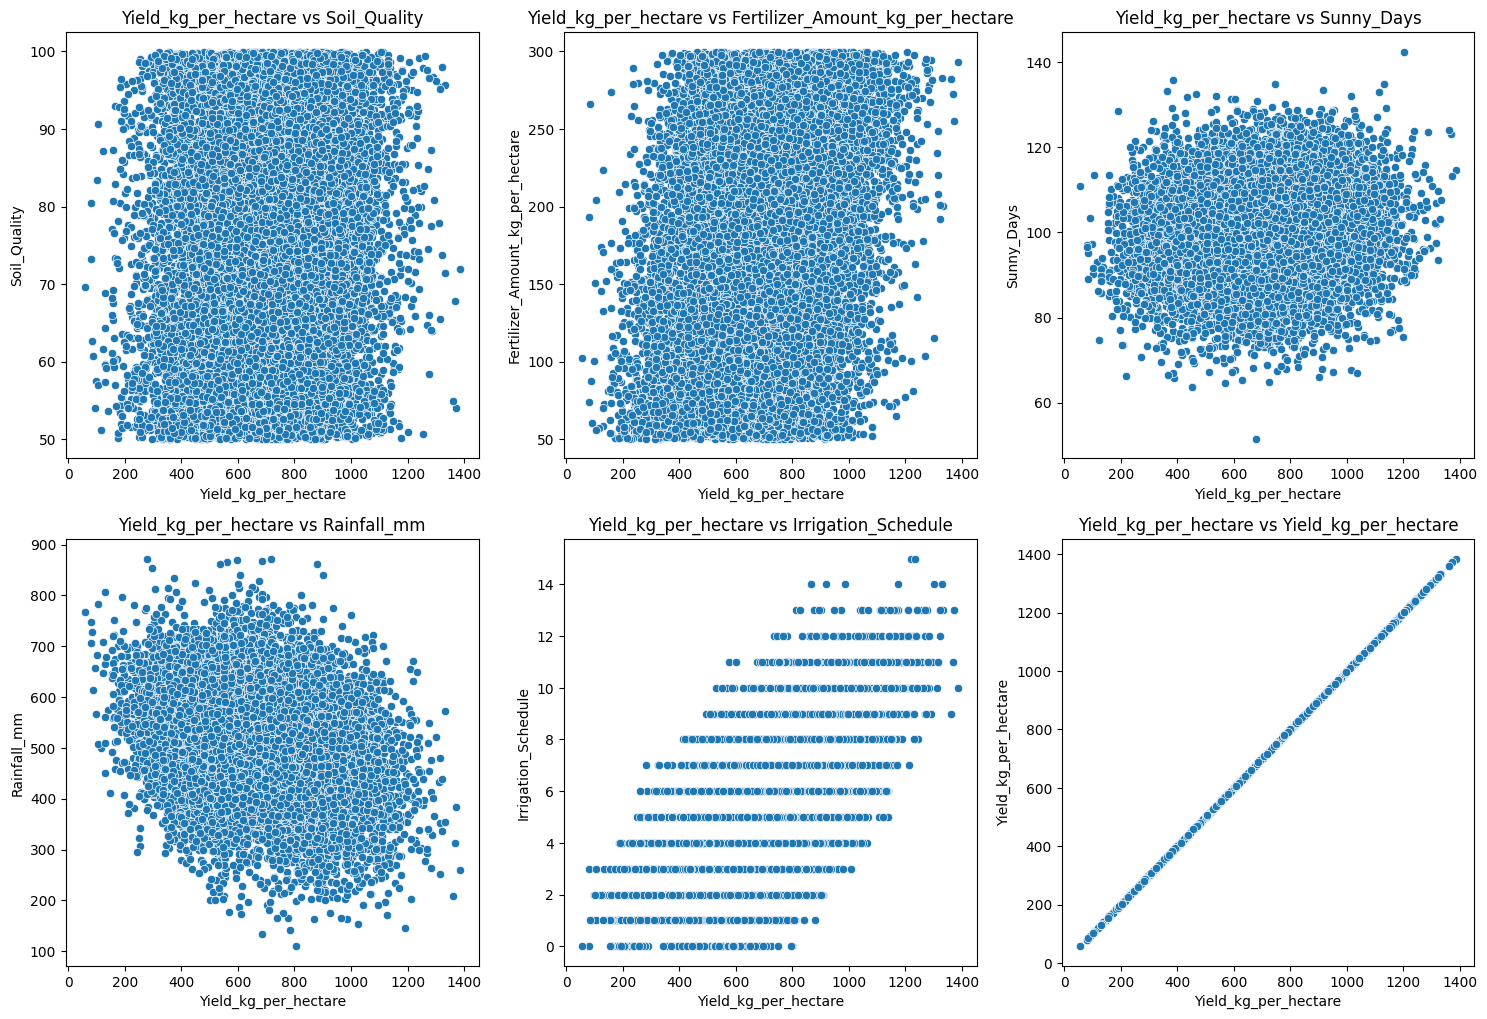

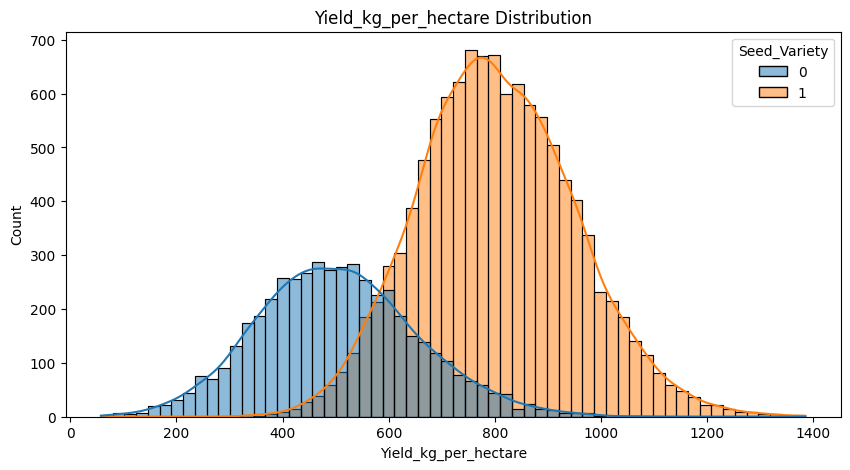

In [19]:
plt.figure(figsize=(15, 20))

# делаем диаграммы рассеивания для каждой числовой переменной относительно урожайности
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x='Yield_kg_per_hectare', y=column)
    plt.title(f'Yield_kg_per_hectare vs {column}')

plt.tight_layout()
plt.show()

# Histplot алкоголь
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Yield_kg_per_hectare', hue='Seed_Variety', kde=True)
plt.title('Yield_kg_per_hectare Distribution')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Soil_Quality                      16000 non-null  float64 
 1   Seed_Variety                      16000 non-null  category
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64 
 3   Sunny_Days                        16000 non-null  float64 
 4   Rainfall_mm                       16000 non-null  float64 
 5   Irrigation_Schedule               16000 non-null  int64   
 6   Yield_kg_per_hectare              16000 non-null  float64 
dtypes: category(1), float64(5), int64(1)
memory usage: 765.9 KB


<ipython-input-21-db059f2c0cff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Yield_kg_per_hectare']
<ipython-input-21-db059f2c0cff>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_features.corr(), annot=True)


<Axes: >

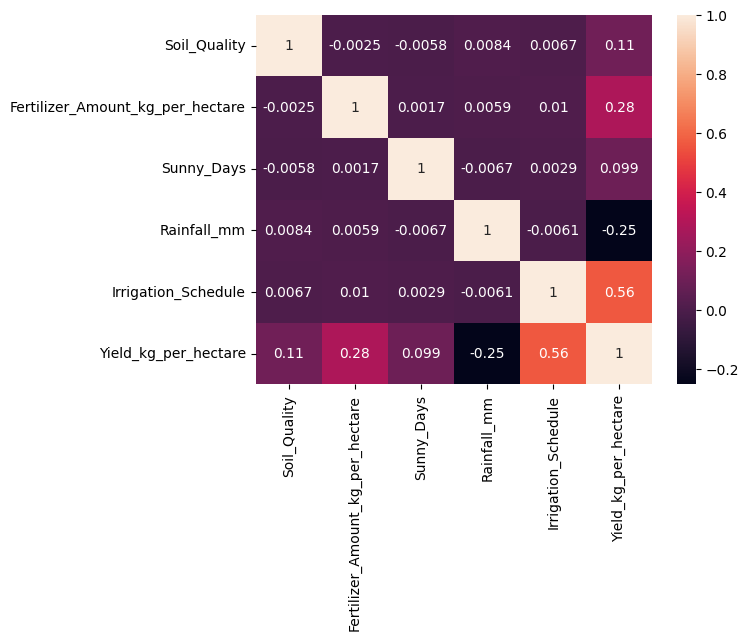

In [21]:
df.corr()['Yield_kg_per_hectare']

feature_columns = ['Soil_Quality', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule', 'Seed_Variety']

df_features = df[feature_columns + ['Yield_kg_per_hectare']]

sns.heatmap(df_features.corr(), annot=True)

In [22]:
df_features

,Soil_Quality,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Seed_Variety,Yield_kg_per_hectare
0,96.415657,147.853040,94.593926,444.267569,3,1,683.759119
1,92.352626,281.565396,90.504644,517.585491,7,0,678.714861
2,63.714785,137.864940,97.329340,420.310945,8,1,934.691975
3,90.084256,100.946659,113.404828,547.817646,7,1,905.842541
4,81.600341,223.088908,83.048176,434.726333,6,1,897.584665
...,...,...,...,...,...,...,...
15995,77.053550,154.189768,103.115855,319.915079,7,1,956.781949
15996,99.795631,282.295839,123.598354,647.292136,4,1,879.682714
15997,67.478487,120.017122,102.308627,514.372747,8,1,932.829561
15998,85.176890,247.847389,114.956634,695.035801,6,1,889.738438


### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [23]:
"""
Код здесь
"""
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_dataframe(df):
    # Проверяем на наличие необходимых столбцов
    required_columns = ['Soil_Quality', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule', 'Seed_Variety']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("DataFrame must contain the required columns.")

    # Создание копии DataFrame, чтобы не изменять исходный df
    df_transformed = df_features.copy()

    # Преобразование первых четырех признаков с помощью StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[required_columns[:-1]])

    # Преобразование 'ph_bins' с помощью pd.get_dummies
    ph_bins_dummies = pd.get_dummies(df_transformed['Seed_Variety'], prefix='seed')

    # Объединение масштабированных признаков и dummy переменных
    df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:-1])
    df_transformed = pd.concat([df_transformed, ph_bins_dummies], axis=1)

    return df_transformed

df_research = transform_dataframe(df[['Soil_Quality', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule', 'Seed_Variety']])
pd.concat([df_research, df['Yield_kg_per_hectare'], ], axis=1)

,Soil_Quality,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,seed_0,seed_1,Yield_kg_per_hectare
0,1.490574,-0.379691,-0.534440,-0.562263,-0.911955,0,1,683.759119
1,1.210921,1.478208,-0.944175,0.170481,0.882073,1,0,678.714861
2,-0.760181,-0.518473,-0.260358,-0.801688,1.330580,0,1,934.691975
3,1.054793,-1.031443,1.350364,0.472624,0.882073,0,1,905.842541
4,0.470857,0.665692,-1.691294,-0.657619,0.433566,0,1,897.584665
...,...,...,...,...,...,...,...,...
15995,0.157907,-0.291644,0.319436,-1.805051,0.882073,0,1,956.781949
15996,1.723213,1.488357,2.371729,1.466779,-0.463448,0,1,879.682714
15997,-0.501131,-0.766464,0.238554,0.138373,1.330580,0,1,932.829561
15998,0.717026,1.009705,1.505851,1.943933,0.433566,0,1,889.738438


# **СИИИИИИИИИИИИИИИИИИИИИИИИИ**

### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      4000 non-null   float64
 1   Seed_Variety                      4000 non-null   int64  
 2   Fertilizer_Amount_kg_per_hectare  4000 non-null   float64
 3   Sunny_Days                        4000 non-null   float64
 4   Rainfall_mm                       4000 non-null   float64
 5   Irrigation_Schedule               4000 non-null   int64  
 6   Yield_kg_per_hectare              4000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 218.9 KB


In [25]:
df1['Seed_Variety'] = df1.Seed_Variety.astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Soil_Quality                      4000 non-null   float64 
 1   Seed_Variety                      4000 non-null   category
 2   Fertilizer_Amount_kg_per_hectare  4000 non-null   float64 
 3   Sunny_Days                        4000 non-null   float64 
 4   Rainfall_mm                       4000 non-null   float64 
 5   Irrigation_Schedule               4000 non-null   int64   
 6   Yield_kg_per_hectare              4000 non-null   float64 
dtypes: category(1), float64(5), int64(1)
memory usage: 191.7 KB


In [26]:
def transform_dataframe1(df1):
    # Проверка на наличие необходимых столбцов
    required_columns1 = ['Soil_Quality', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule', 'Seed_Variety']
    if not all(column in df1.columns for column in required_columns1):
        raise ValueError("DataFrame must contain the required columns.")

    # Создание копии DataFrame, чтобы не изменять исходный df
    df_transformed1 = df1.copy()

    # Преобразование первых четырех признаков с помощью StandardScaler
    scaler1 = StandardScaler()
    scaled_features1 = scaler1.fit_transform(df_transformed1[required_columns1[:-1]])

    # Преобразование 'ph_bins' с помощью pd.get_dummies
    ph_bins_dummies1 = pd.get_dummies(df_transformed1['Seed_Variety'], prefix='seed')

    # Объединение масштабированных признаков и dummy переменных
    df_transformed1 = pd.DataFrame(scaled_features1, columns=required_columns1[:-1])
    df_transformed1 = pd.concat([df_transformed1, ph_bins_dummies1], axis=1)

    return df_transformed1

df_research1 = transform_dataframe1(df1[['Soil_Quality', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule', 'Seed_Variety']])
pd.concat([df_research1, df1['Yield_kg_per_hectare'], ], axis=1)

,Soil_Quality,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,seed_0,seed_1,Yield_kg_per_hectare
0,1.268052,-0.566125,-0.320674,1.009366,-0.875180,1,0,278.986563
1,0.603657,-1.606913,-0.084347,-0.360127,1.337665,0,1,836.434840
2,-0.618299,0.753197,0.505977,0.081381,-0.432611,0,1,785.881787
3,0.259953,0.039659,-0.981595,-1.490728,0.009958,0,1,807.884526
4,-0.173119,-0.185044,0.139587,-0.587165,2.222803,0,1,1064.542374
...,...,...,...,...,...,...,...,...
3995,1.391547,-0.682517,-0.088079,-0.055849,0.009958,0,1,802.209345
3996,-1.494911,-1.011720,1.173972,1.661215,1.337665,1,0,509.646540
3997,1.326061,0.318532,1.027777,-0.443555,-0.875180,0,1,776.013634
3998,-0.929514,-1.284123,-0.204910,2.786059,-0.432611,0,1,502.319484


In [27]:
"""
Код здесь
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной
X = df_research
y = df['Yield_kg_per_hectare']
X1 = df_research1
y1 = df1['Yield_kg_per_hectare']
X_train=X
y_train=y
X_test=X1
y_test=y1


### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [28]:
"""
Код здесь
"""
def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [30]:
model = compute_regression(X_train, y_train) # Прогноз на обучающей выборке
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 40.06283718688171,
 'MSE': 2505.1412987226836,
 'R2': 0.938729674504097,
 'mape (reverted - % верно угаданых)': 93.66563548475511,
 'mape (original - % ошибок)': 6.334364515244882}

In [31]:
model = compute_regression(X_train, y_train) # Прогноз на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 40.85416421798234,
 'MSE': 2596.5671143915215,
 'R2': 0.934742159718966,
 'mape (reverted - % верно угаданых)': 93.45332702760962,
 'mape (original - % ошибок)': 6.54667297239038}

In [32]:
coefficients = model.coef_
coefficients

array([  22.42750112,   58.20935857,   19.88379322,  -50.5835269 ,
        111.45136347, -150.23185054,  150.23185054])

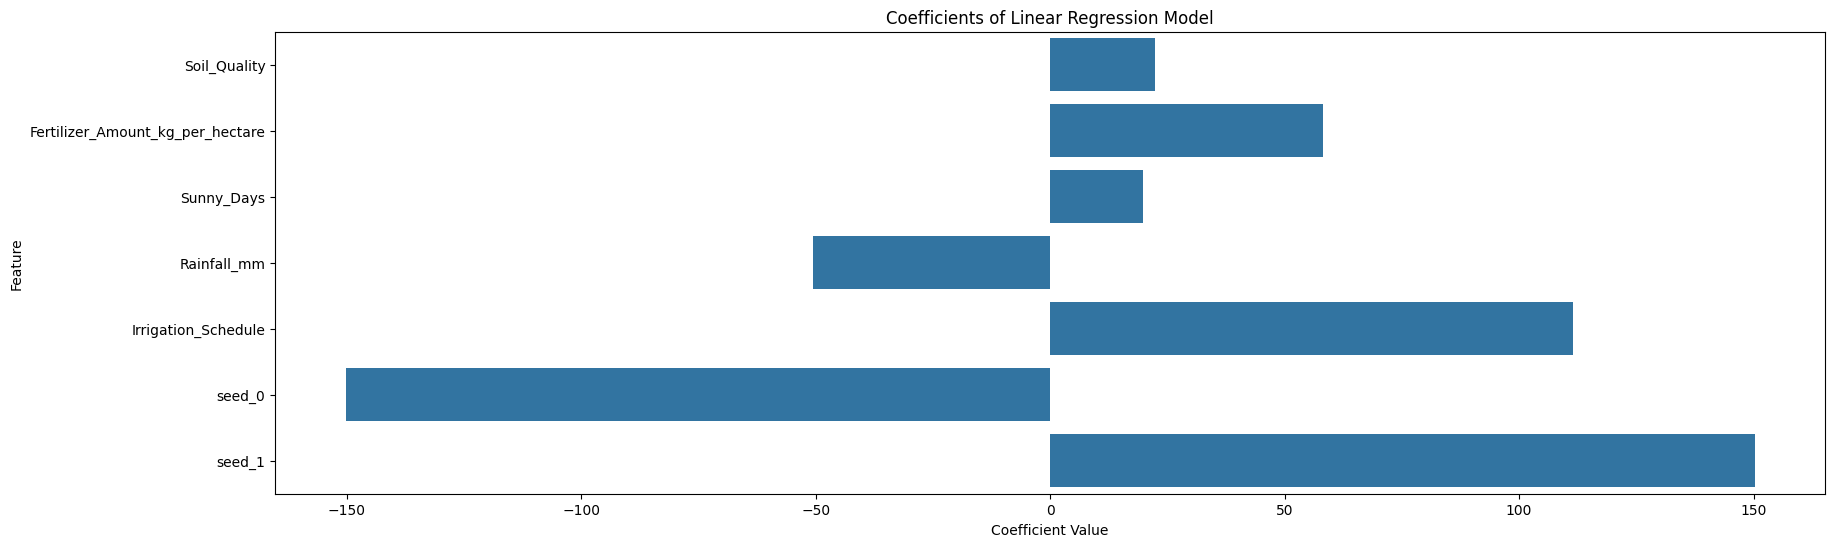

In [33]:
# Получаем коэффициентов линейной регрессии
coefficients = model.coef_

# называем признаки
feature_names = ['Soil_Quality', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule', 'seed_0', 'seed_1']

# Визуализируем коэффициенты
plt.figure(figsize=(20, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [34]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Soil_Quality', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days',
        'Rainfall_mm', 'Irrigation_Schedule', 'seed_0', 'seed_1'],
       dtype=object),
 'n_features_in_': 7,
 'coef_': array([  22.42750112,   58.20935857,   19.88379322,  -50.5835269 ,
         111.45136347, -150.23185054,  150.23185054]),
 'rank_': 6,
 'singular_': array([1.27381453e+02, 1.27202216e+02, 1.26555147e+02, 1.26083605e+02,
        1.25229083e+02, 8.18060496e+01, 4.51388470e-15]),
 'intercept_': 653.3060575959552}

Формула регрессии: y = 653.306 + 22.43 × Soil_Quality + 58.21 × Fertilizer_Amount_kg_per_hectare + 19.88 × Sunny_Days - 50.58 × Rainfall_mm + 111.45 × Irrigation_Schedule - 150.23 × seed_0 + 150.23 × seed_1

In [35]:
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances

def knn_regressor(X_train, y_train, X_test, k=5):
    """
    Простая реализация KNN регрессии.

    Параметры:
    X_train: np.array - обучающий набор признаков
    y_train: np.array - обучающий набор целевой переменной
    X_test: np.array - тестовый набор признаков
    k: int - количество соседей

    Возвращает:
    y_pred: np.array - предсказанные значения для тестового набора
    """

    # Рассчитываем метрику расстояния (для примера - Евклидово расстояние)
    #от каждой тестовой точки до всех точек обучающего набора
    distances = euclidean_distances(X_test, X_train)

    # Инициализация массива для предсказаний
    y_pred = np.zeros(len(X_test))

    # Цикл по всем тестовым точкам
    for i in range(0, len(X_test)):
      test_point = X_test.iloc[i].to_numpy()
      neighbors = np.argsort(distances[i])[:k]
      y_pred[i] = np.mean(y_train[neighbors])

    return y_pred

# Пример использования функции:
# X_train, y_train, X_test уже должны быть определены


y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)
compute_metrics(y_test, y_pred)

{'MAE': 50.158168485845835,
 'MSE': 3902.4671569890784,
 'R2': 0.9019218193817214,
 'mape (reverted - % верно угаданых)': 91.90731402113238,
 'mape (original - % ошибок)': 8.092685978867621}

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""